**Trabajo Práctico II**

---
Tecnicatura Universitaria en Inteligencia Artificial

Materia: Minería de Datos

Fecha de entrega: 

Estudiantes:

*   Domingo, Francisco
*   Valeri, Lara Rita

Año de cursada: 1° cuatrimestre 2024

Docentes:
* Flavio E. Spetale
* Facundo Vasquez

# Importamos las librerias y descargamos el archivo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
# from mpl_toolkits.mplot3d import Axes3D

# from sklearn.preprocessing import StandardScaler
# from sklearn.manifold import TSNE, Isomap
# from sklearn.decomposition import PCA
# import umap

In [2]:
# Generación de dataframe a partir del CSV
df = pd.read_csv('1000_Companies.csv')

# Visualización de las primeras 5 filas para conocer la estructura de los datos
print(df.head())

   RyD_Spend  Administration  MarketingSpend       State     Profit
0  165349.20       136897.80       471784.10    New York  192261.83
1  162597.70       151377.59       443898.53  California  191792.06
2  153441.51       101145.55       407934.54     Florida  191050.39
3  144372.41       118671.85       383199.62    New York  182901.99
4  142107.34        91391.77       366168.42     Florida  166187.94


El dataset que utilizaremos en esta parte del trabajo esta relacionado con el comportamiento financiero de 1000 empresas.

In [3]:
print(df.shape)

(1000, 5)


# Analisis de los atributos del conjunto de datos 

In [4]:
# Obtenemos información general sobre el DataFrame, incluyendo tipos de datos y conteo de valores no nulos
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB
None


Podemos observar que no tenemos datos nulos y que los datos pueden ser flotantes y objetos. Analizamos un poco más el tipo de datos, unidad de medida y que representan en el contexto del dataset.

In [5]:
# A continuación obtenemos una tabla que describe nuestros datos: media, desvío, cuartiles, valores máximos y minimos para cada columna.
df.describe()
#Eso se realiza solo para las variables numéricas, es decir no se eincluye state

,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


- RyD_Spend: Gastos en investigación y Desarrollo
- Administration: gastos en Administración
- MarketingSpend: gastos en Marketing
- Profit: ganancia de la compañía.

Suponemos que estas variables se encuentran en dólares ya que los estados corresponden a Estados Unidos.
- State: estado donde se encuentra la compañía que, como se puede ver a conitnuación, los estados pueden ser: New York, California o Florida 

In [6]:
states= df['State'].unique()
states

array(['New York', 'California', 'Florida'], dtype=object)

In [7]:
# Vamos a codificar esta columna
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])
# Veamos el resultado
states_enc = df['State'].unique()
print("Códigos para identificar a los estados: ")
print('Estado', 'Código')
for cu, co in zip(states, states_enc):
    print('{:<10} {:<5}'.format(cu, co))

Códigos para identificar a los estados: 
Estado Código
New York   2    
California 0    
Florida    1    


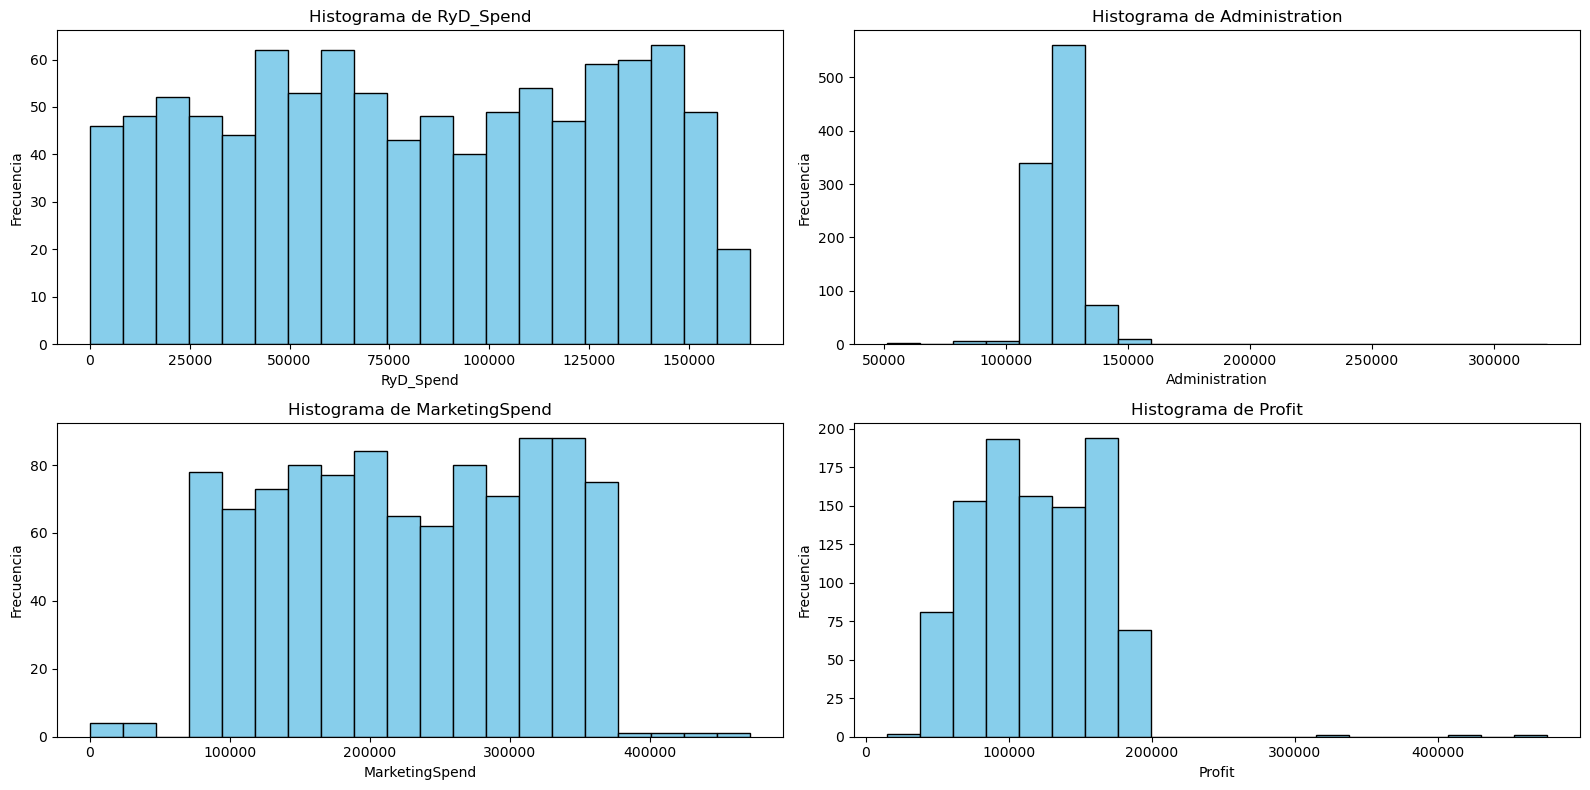

In [8]:
# Realizamos un histograma de las variables numéricas
variables_numericas = ['RyD_Spend', 'Administration','MarketingSpend', 'Profit']
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

for i, variable in enumerate(variables_numericas):
    fila = i // 2
    columna = i % 2
    axs[fila, columna].hist(df[variable], bins=20, color='skyblue', edgecolor='black')
    axs[fila, columna].set_xlabel(variable)
    axs[fila, columna].set_ylabel('Frecuencia')
    axs[fila, columna].set_title('Histograma de ' + variable) 


plt.tight_layout()

plt.show()

#HACER: interpretar estos gráficos ver si los dejamos o no.

# Eliminación de outliers

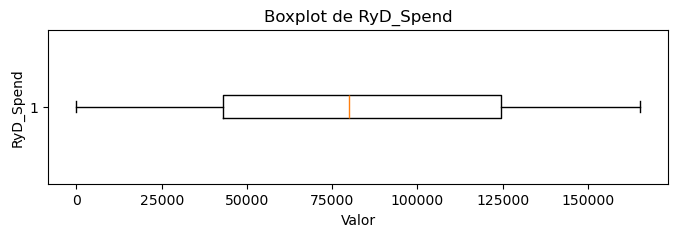

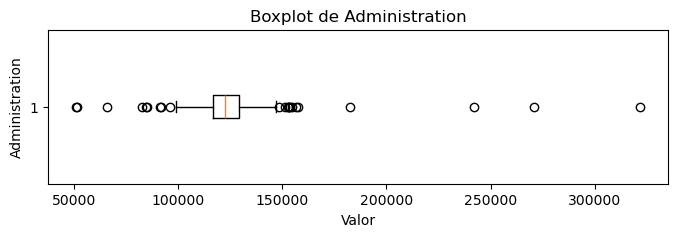

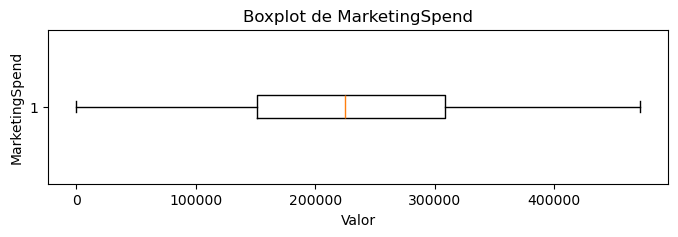

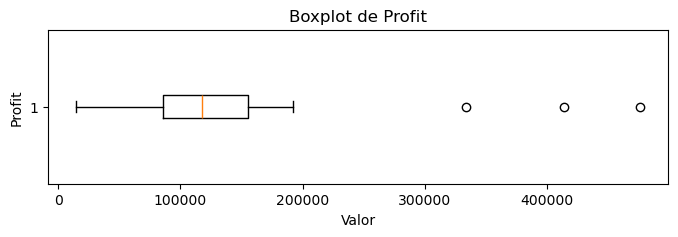

In [9]:
for variable in variables_numericas:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[variable], vert=False)
    plt.xlabel('Valor')
    plt.ylabel(variable)
    plt.title('Boxplot de ' + variable)
    plt.show()


A partir de los gráficos anteriores podemos observar tanto RyD_Spend como MarketingSpend, no tiene valores atípicos. Mientras que Profit y Administration si tienen. 

Ademas podemos obsevar que Profit tiene solo 3 valores atípicos, administration no llegamos a ver cuantos valores atípicos tiene en total pero se observan varios puntos que están fuera de el rango intercuartilico.

hacer un boxplot para cada state y cada variable y ahi ver si verdaderamente hay outliers
despues si hay outliers entrenar dos veces
una con y una sin
sin las metricas no mejoran
entonces no eran aouliers
